![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [26]:
# Import standard packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, optimizers, losses, metrics
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, recall_score, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier

np.random.seed(42)
%matplotlib inline

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [5]:
train_path = '../data/chest_xray/train/' 
test_path = '../data/chest_xray/test/'

In [6]:
idg = ImageDataGenerator(rescale=1/255, validation_split = 0.20)

train_set = idg.flow_from_directory(train_path, target_size=(128, 128),
                                    color_mode='grayscale', class_mode='binary', subset='training')

validation_set = idg.flow_from_directory(train_path, target_size=(128, 128), 
                                         color_mode='grayscale', class_mode='binary', subset='validation')

test_set = idg.flow_from_directory(test_path, target_size=(128, 128), 
                                         color_mode='grayscale', class_mode='binary', shuffle=False)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Augmentation

In [35]:
train_idg = ImageDataGenerator(rescale=1/255,
                               validation_split = 0.20,
                               rotation_range=40, 
                               width_shift_range=0.2, 
                               height_shift_range=0.2, 
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')
                                   

train_set_aug = train_idg.flow_from_directory(train_path, target_size=(128, 128), 
                                         color_mode='grayscale', class_mode='binary', subset='training')

validation_set = train_idg.flow_from_directory(train_path, target_size=(128, 128), 
                                         color_mode='grayscale', class_mode='binary', subset='validation')


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [ ]:
def model_metrics(history):
    
    

In [7]:
def plt_conf_mat(model):
    
    y_pred = model.predict(test_set)
    
    y_hat = (y_pred > 0.5)
                      
    ConfusionMatrixDisplay(confusion_matrix(test_set.classes, y_hat))

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Dummy Classifier

In [9]:
train_dummy = idg.flow_from_directory(train_path,
                                      target_size=(128, 128),
                                      color_mode='grayscale',
                                      class_mode='binary',
                                      subset='training', 
                                      batch_size=4173)

test_dummy = idg.flow_from_directory(test_path, 
                                         target_size=(128, 128),
                                         color_mode='grayscale',
                                         class_mode='binary',
                                         shuffle=False,
                                         batch_size=624)

train_images, train_labels = next(train_dummy)
test_images, test_labels = next(test_dummy)

Found 4173 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
baseline_model = DummyClassifier(strategy= 'most_frequent')
baseline_model.fit(train_images, train_labels)

DummyClassifier(strategy='most_frequent')

0.625
1.0


/Users/meiralelov/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


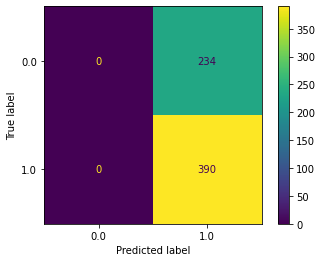

In [11]:
base_accuracy = baseline_model.score(test_images, test_labels)
print(base_accuracy)

y_base_pred = baseline_model.predict(test_images)

base_recall = recall_score(test_labels, y_base_pred)
print(base_recall)

plot_confusion_matrix(baseline_model, test_images, test_labels);

## FSM

In [12]:
#simple_model = models.Sequential()

#simple_model.add(Flatten(input_shape = (128, 128, 1)))
#simple_model.add(Dense(20, activation= 'sigmoid'))
#simple_model.add(Dense(12, activation= 'sigmoid'))
#simple_model.add(Dense(8, activation= 'sigmoid'))
#simple_model.add(Dense(1, activation='sigmoid'))

#simple_model.compile(optimizer='SGD',
              #loss='binary_crossentropy',
              #metrics=['accuracy', metrics.Recall(name='recall')])

#results = simple_model.fit(train_set_aug, epochs=100, batch_size=None, verbose=1, validation_data=validation_set)

#simple_model.save('../data/fsm.h5')

In [34]:
simple_model = models.load_model('../data/fsm.h5')

AttributeError: 'str' object has no attribute 'decode'

In [19]:
simple_model.summary()

NameError: name 'simple_model' is not defined

In [ ]:
#wrap in wrapper, do a cv score on validation. don't do evaluate until very end. 

In [8]:
plt_conf_mat(simple_model)

NameError: name 'simple_model' is not defined

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***